In [1]:
#Heart Disease Prediction using Logistic Regression
#The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD)

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
sn.set_style("darkgrid")

In [94]:
#nimesha
# Loading Heart Data from framingham.csv
chd_df=pd.read_csv("framingham.csv")
#drop a column
chd_df.drop(['education'],axis=1,inplace=True)
chd_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Rename 'male' column name
chd_df.rename(columns={'male':'sex_male'},inplace=True)

In [5]:
#Find missing values
chd_df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#Counting total no of rows with missing values
count=0
for i in chd_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values =', count)
print('Percentage of rows with missing values in the dataset =',round((count/len(chd_df.index))*100),'%')
print('Therefore, the missing values are eliminated.')

Total number of rows with missing values = 489
Percentage of rows with missing values in the dataset = 12 %
Therefore, the missing values are eliminated.


In [7]:
#dropping the missing values
chd_df.dropna(axis=0,inplace=True)

<AxesSubplot:>

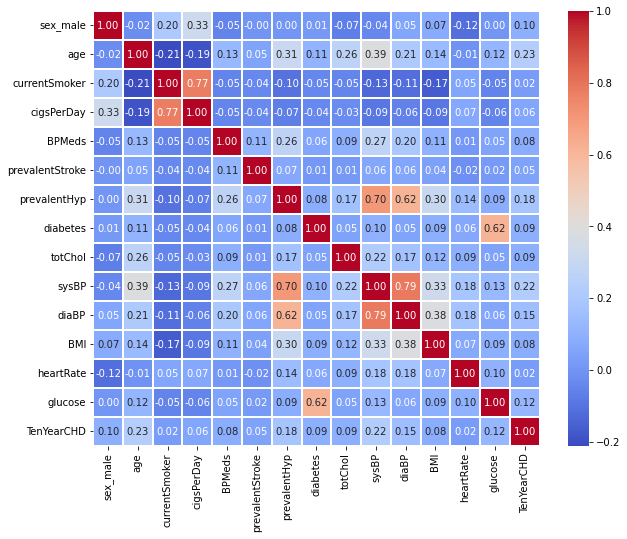

In [67]:
plt.figure(figsize=(10,8))
sn.heatmap(chd_df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=2)

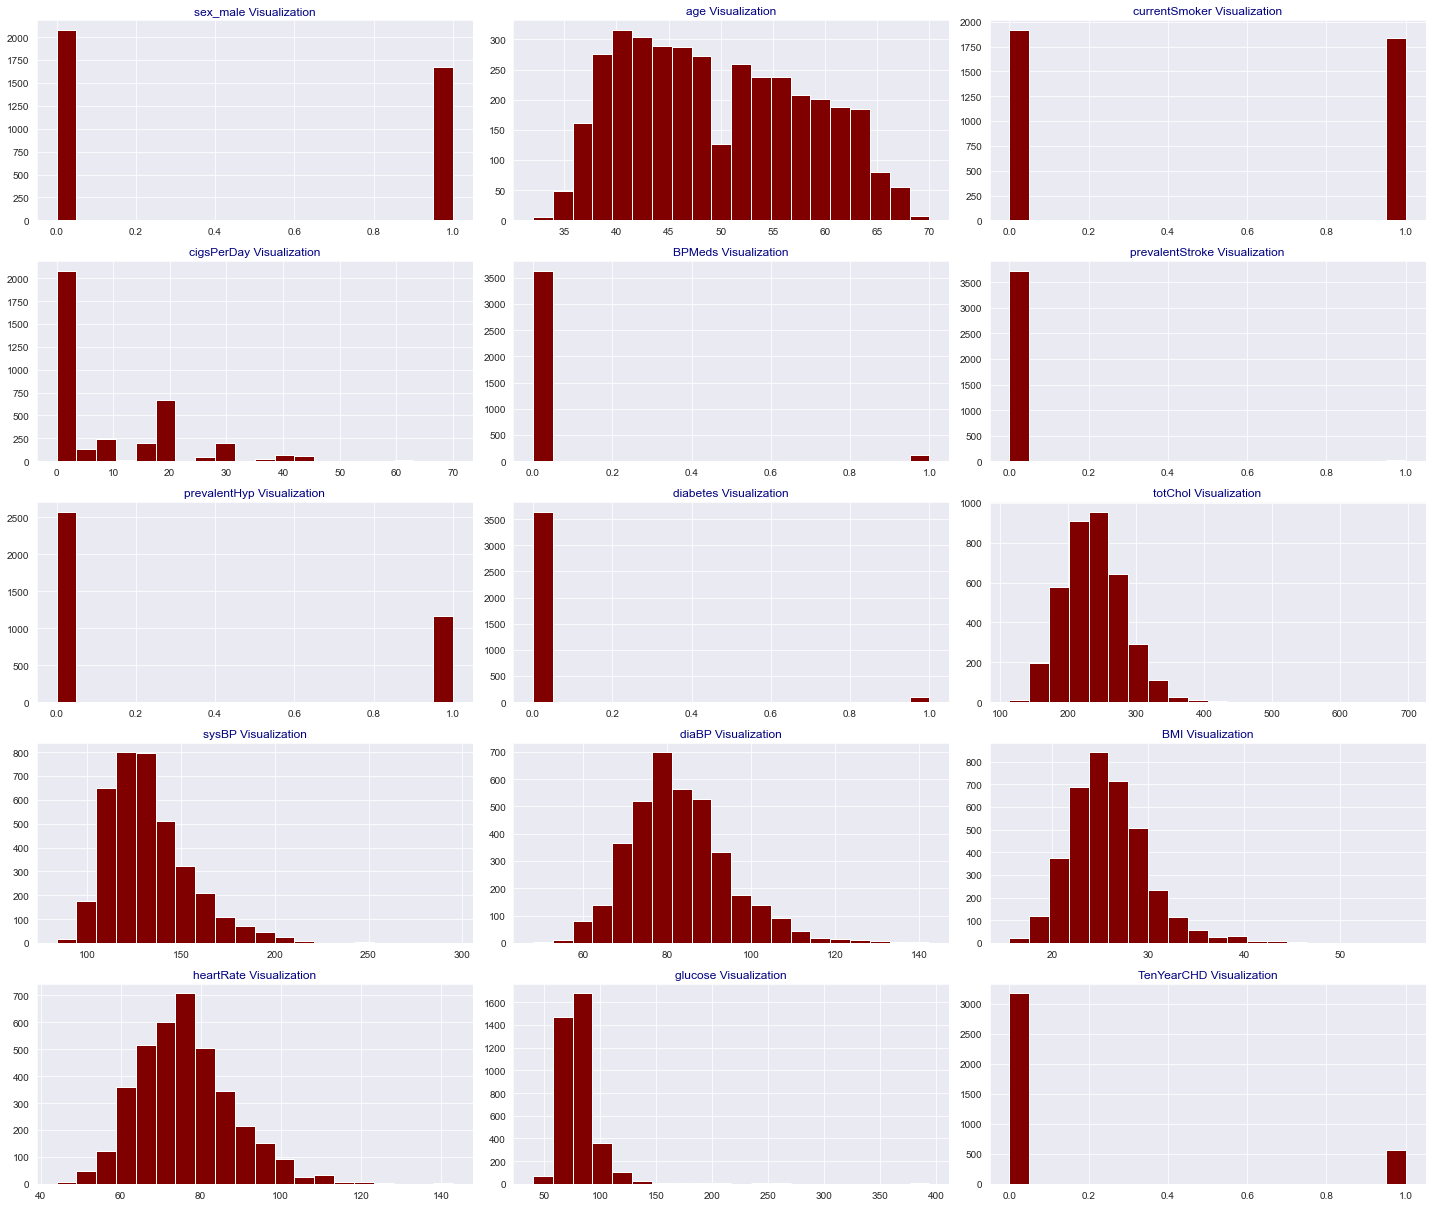

In [9]:
#Exploratory Analysis by drawing histograms for CHD features
def draw_chd_histograms(dataframe, features, rows, cols):
    fig_chd=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax_chd=fig_chd.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax_chd,facecolor='maroon')
        ax_chd.set_title(feature+" Visualization",color='navy')
        
    fig_chd.tight_layout()  
    plt.show()
#Call the histogram function
draw_chd_histograms(chd_df,chd_df.columns,6,3)

In [10]:
#TenYearCHD feature values counting
chd_df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

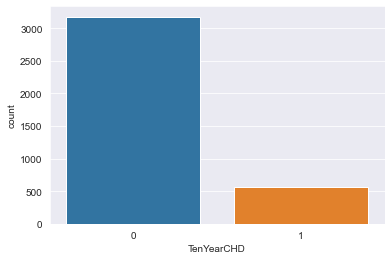

In [11]:
#Plot a graph for the TenYearCHD feature value data 
sn.countplot(x='TenYearCHD',data=chd_df)

In [12]:
print('Therefore, there are',(chd_df.TenYearCHD == 1).sum(),'patients with risk of heart disease and',(chd_df.TenYearCHD == 0).sum(),'patents with no heart disease.')

Therefore, there are 572 patients with risk of heart disease and 3177 patents with no heart disease.


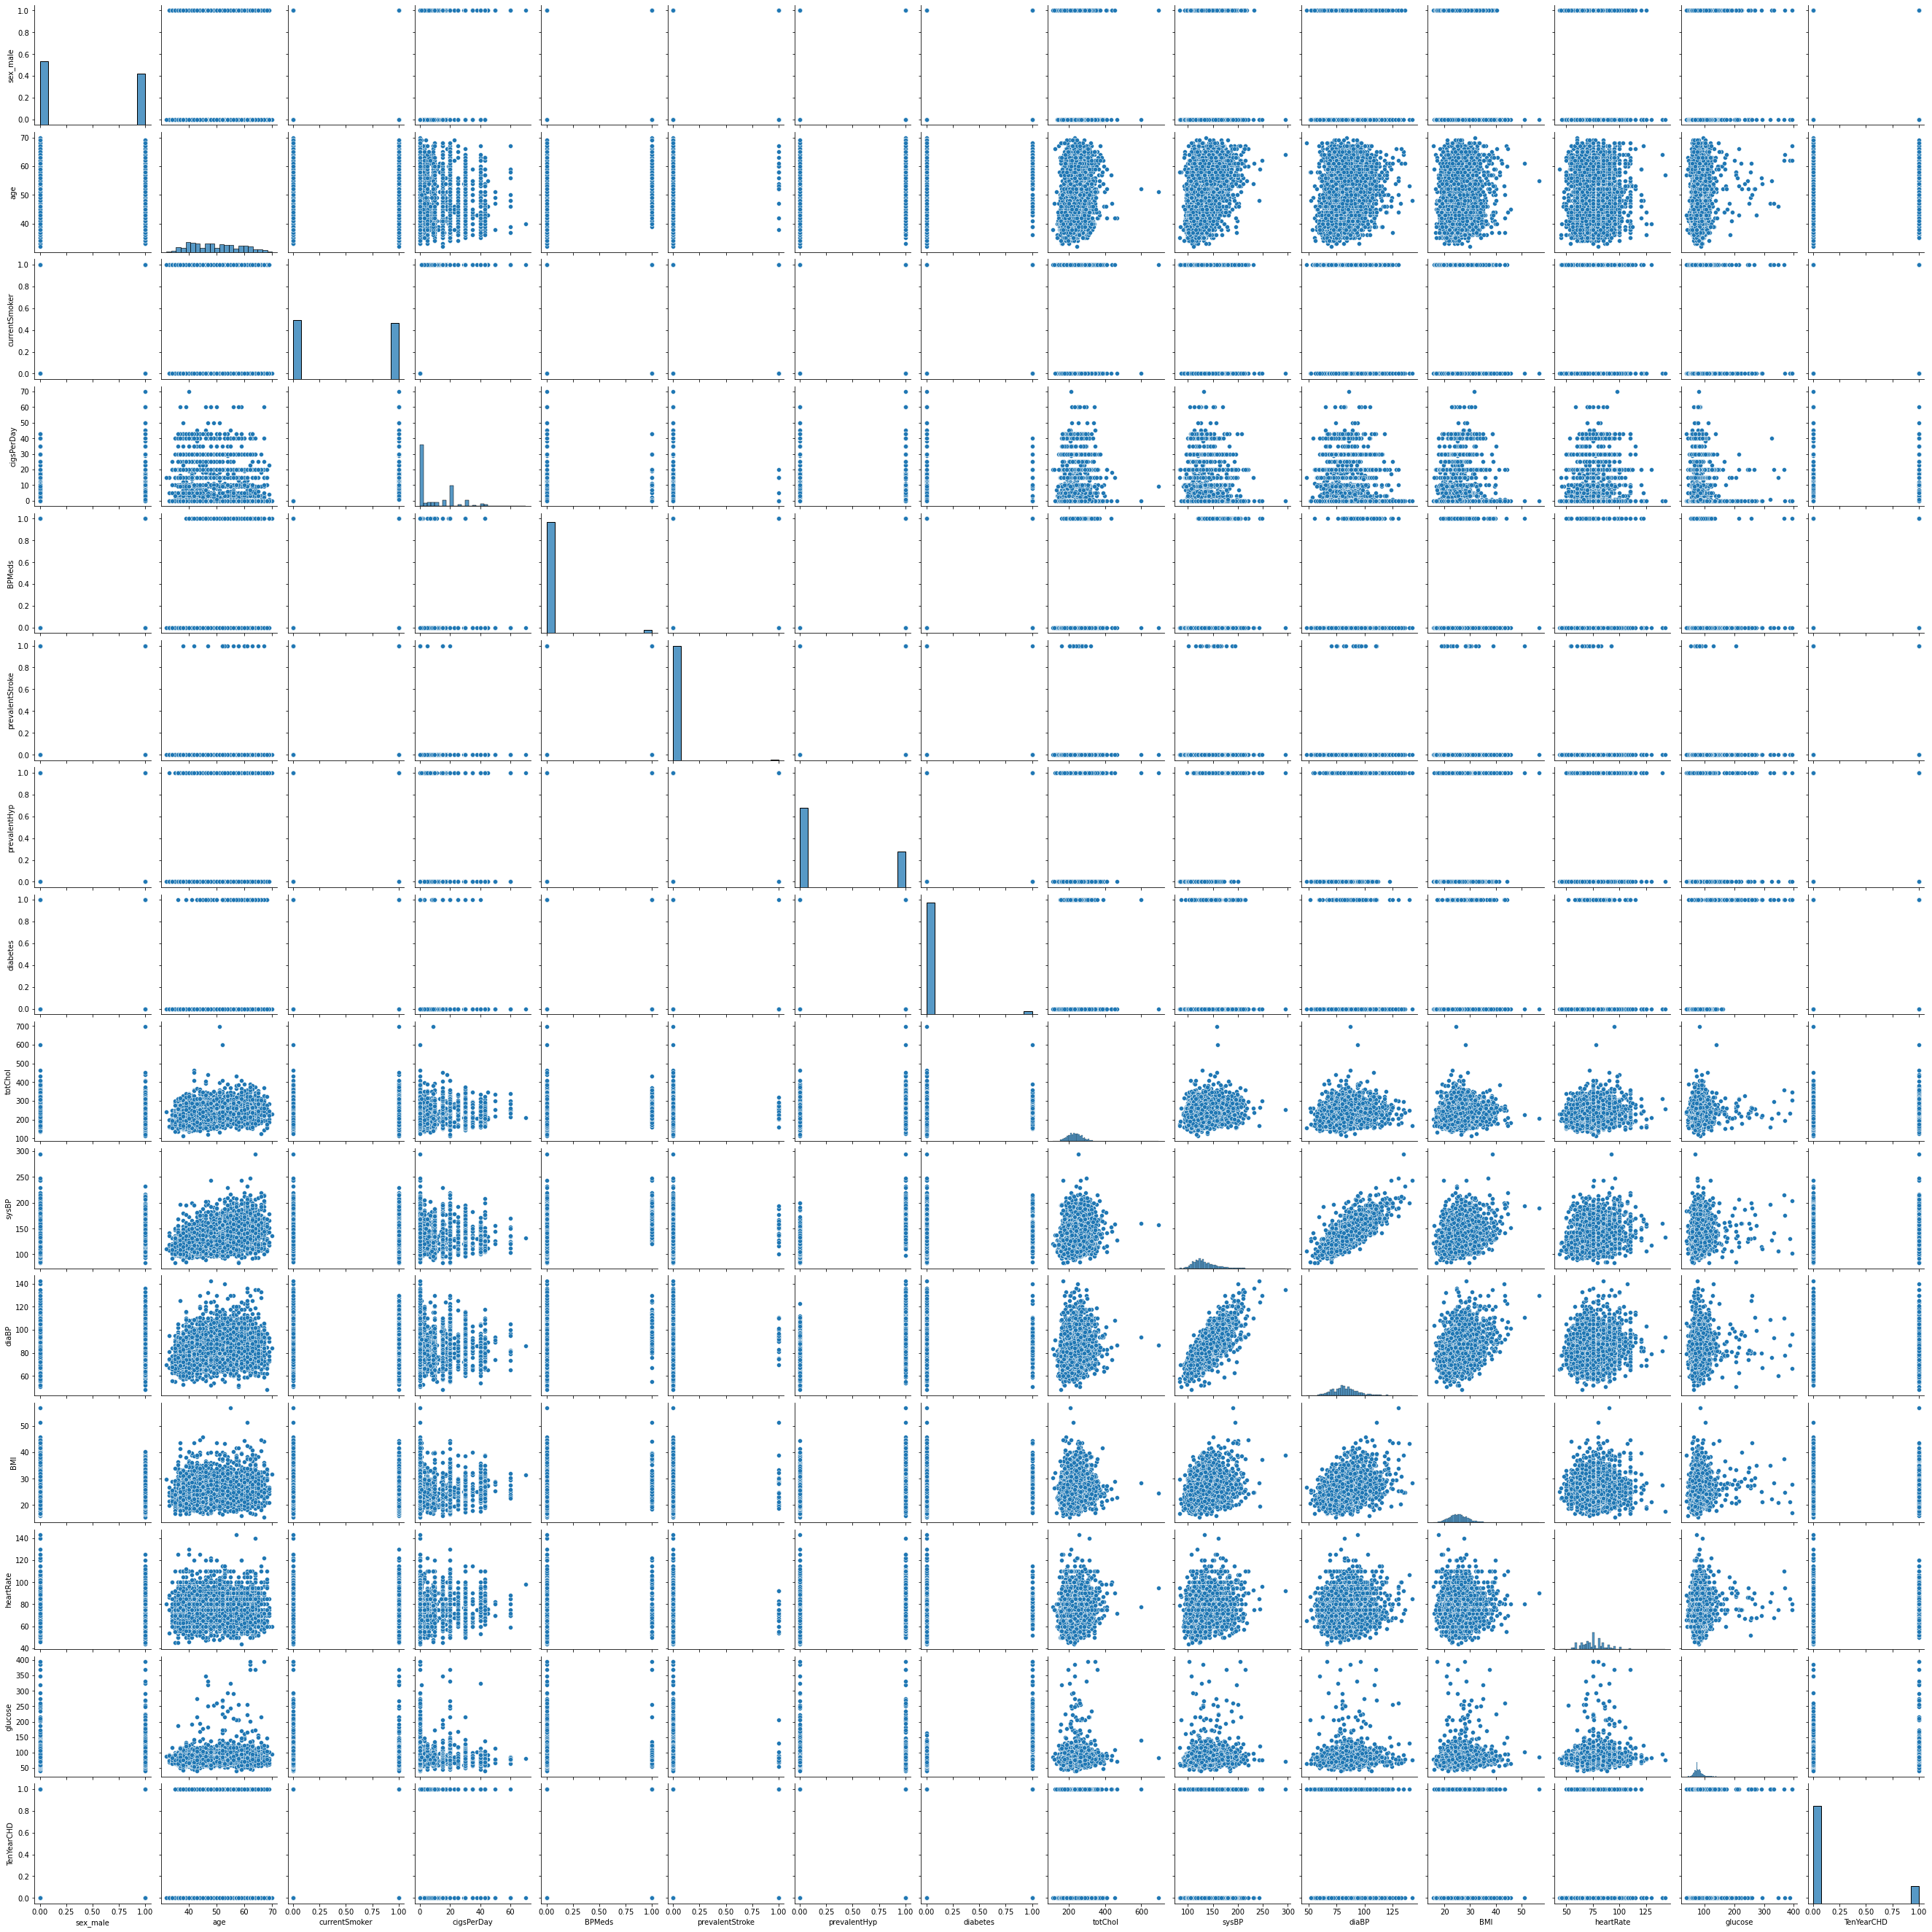

In [68]:
# Plot graphs for all feature data in the dataframe
sn.pairplot(data=chd_df)

In [69]:
# Description of the all feature data in the dataframe
# count - no of non-empty values
# mean - average (mean) value
# std - standard deviation
# min - minimum value
# 25% - 25% percentile
# 50% - 50% percentile
# 75% - 75% percentile
# max - maximum value
chd_df.describe()
# nimesha 

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

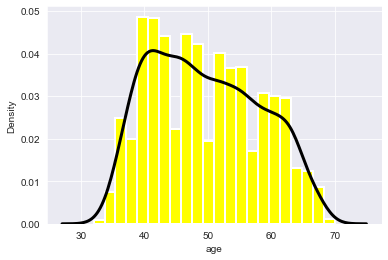

In [15]:
sn.distplot(chd_df['age'],color='Yellow',hist_kws={'alpha':1,"linewidth": 2}, kde_kws={"color": "k", "lw": 3, "label": "KDE"})
#most of people are form age 40-50 
#Gamitha

Text(0.5, 1.0, 'Heart Rate vs Heart Disease')

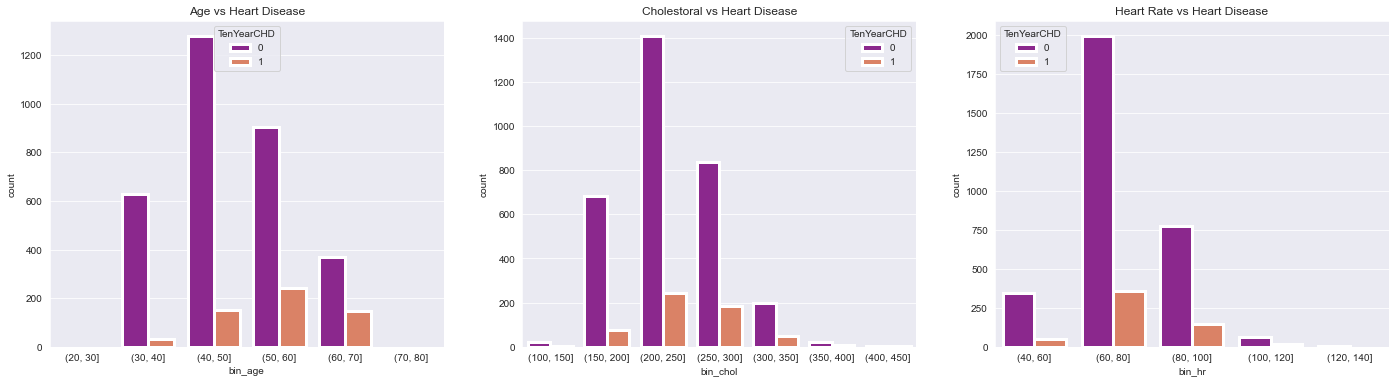

In [80]:
#Gamitha-IT19140476
fig,ax=plt.subplots(figsize=(24,6))

plt.subplot(1, 3, 1)
age_bins = [20,30,40,50,60,70,80]
chd_df['bin_age']=pd.cut(chd_df['age'], bins=age_bins)
g1=sn.countplot(x='bin_age',data=chd_df ,hue='TenYearCHD',palette='plasma',linewidth=3)
g1.set_title("Age vs Heart Disease")
#The number of people with heart disease are more from the age 41-55
#Also most of the people fear heart disease and go for a checkup from age 55-65 and dont have heart disease (Precautions)

plt.subplot(1, 3, 2)
chol_bins = [100,150,200,250,300,350,400,450]
chd_df['bin_chol']=pd.cut(chd_df['totChol'], bins=chol_bins)
g2=sn.countplot(x='bin_chol',data=chd_df,hue='TenYearCHD',palette='plasma',linewidth=3)
g2.set_title("Cholestoral vs Heart Disease")
#Most people get the heart disease with 200-250 cholestrol 
#The others with cholestrol of above 250 tend to think they have heart disease but the rate of heart disease falls

plt.subplot(1, 3, 3)
hr_bins = [40,60,80,100,120,140]
chd_df['bin_hr']=pd.cut(chd_df['heartRate'], bins=hr_bins)
g3=sn.countplot(x='bin_hr',data=chd_df,hue='TenYearCHD',palette='plasma',linewidth=3)
g3.set_title("Heart Rate vs Heart Disease")
#People who have thalach between 140-180 have a very high chance of getting the heart disease 

Text(0.5, 1.0, 'Average Number of Cigarettes Smoked Per Day vs Heart Disease')

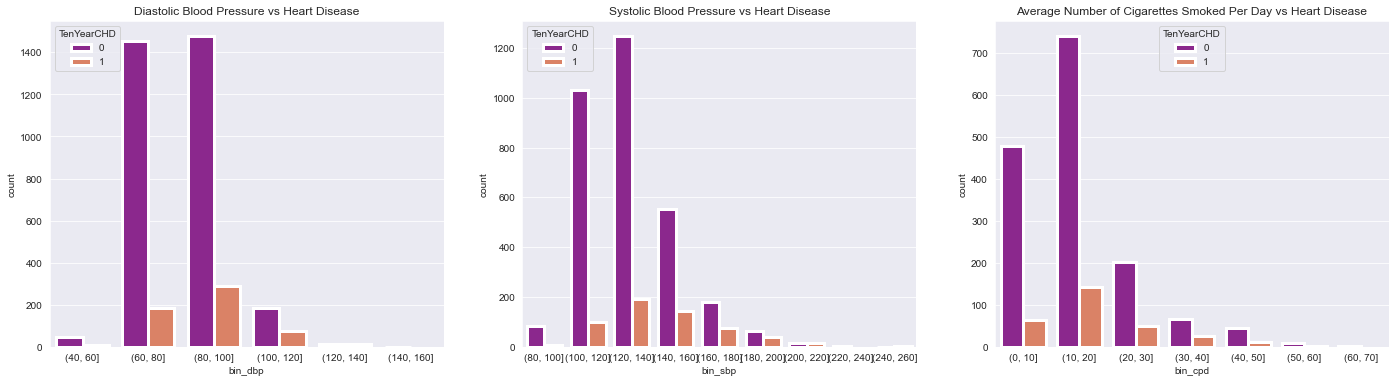

In [81]:
#Sanduni -IT19123578
fig,ax=plt.subplots(figsize=(24,6))

plt.subplot(1, 3, 1)
dbp_bins = [40,60,80,100,120,140,160]
chd_df['bin_dbp']=pd.cut(chd_df['diaBP'], bins=dbp_bins)
g1=sn.countplot(x='bin_dbp',data=chd_df ,hue='TenYearCHD',palette='plasma',linewidth=3)
g1.set_title("Diastolic Blood Pressure vs Heart Disease")
#People who have Continuous Diastolic Blood Pressure level from 60-100 have a very high chance of getting the heart disease.

plt.subplot(1, 3, 2)
sbp_bins = [80,100,120,140,160,180,200,220,240,260]
chd_df['bin_sbp']=pd.cut(chd_df['sysBP'], bins=sbp_bins)
g1=sn.countplot(x='bin_sbp',data=chd_df ,hue='TenYearCHD',palette='plasma',linewidth=3)
g1.set_title("Systolic Blood Pressure vs Heart Disease")
#People who have Continuous Systolic Blood Pressure level from 100-140 have a very high chance of getting the heart disease.

plt.subplot(1, 3, 3)
cpd_bins = [0,10,20,30,40,50,60,70]
chd_df['bin_cpd']=pd.cut(chd_df['cigsPerDay'], bins=cpd_bins)
g1=sn.countplot(x='bin_cpd',data=chd_df ,hue='TenYearCHD',palette='plasma',linewidth=3)
g1.set_title("Average Number of Cigarettes Smoked Per Day vs Heart Disease")
#People who smokes 0-20 no of cigarettes per day ave a very high chance of getting the heart disease.

Text(0.5, 1.0, 'BMI vs Heart Disease')

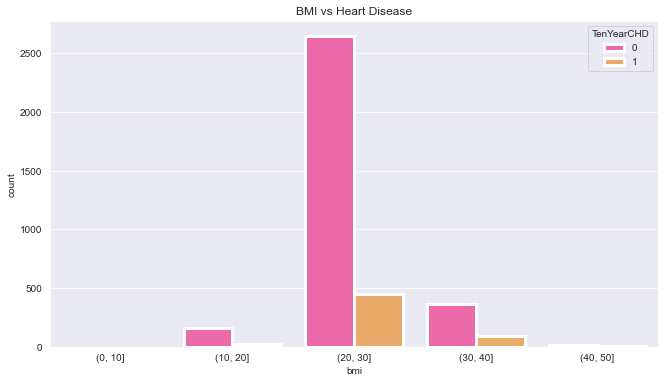

In [82]:
#Gamitha-IT19140476
fig,ax=plt.subplots(figsize=(24,6))

plt.subplot(1, 2, 1)
bmi_bins = [0,10,20,30,40,50]
chd_df['bmi']=pd.cut(chd_df['BMI'], bins=bmi_bins)
x1=sn.countplot(x='bmi',data=chd_df,hue='TenYearCHD',palette='spring',linewidth=3)
x1.set_title('BMI vs Heart Disease')
#People with BMI value between 20-30 have highest chance of heart disease


Text(0.5, 1.0, 'Figure 2')

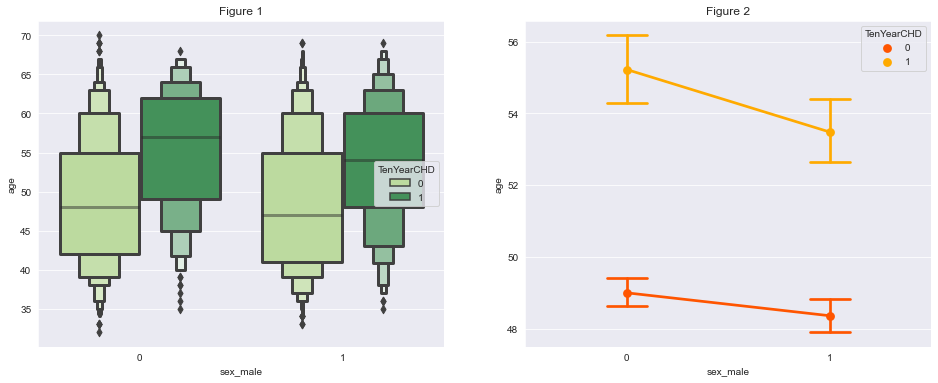

In [83]:
#Sanduni
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(121)
s1=sn.boxenplot(x='sex_male',y='age',hue='TenYearCHD',data=chd_df,palette='YlGn',linewidth=3)
s1.set_title("Figure 1")
#Figure 1 says most of females having heart disease range from 40-70yrs and men from 40-60yrs

plt.subplot(122)
s2=sn.pointplot(x='sex_male',y='age',hue='TenYearCHD',data=chd_df,palette='autumn',capsize=.2)
s2.set_title("Figure 2")
#Figure 2 says mean age for female with heart disease around 54yrs and for males around 51yrs

Text(0.5, 1.0, 'Age vs  Total Cholesterol Level ')

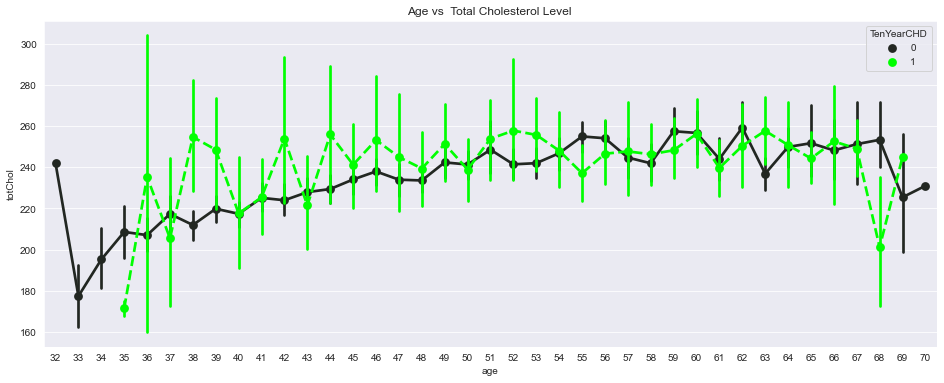

In [84]:
fig,ax=plt.subplots(figsize=(16,6))
sn.pointplot(x='age',y='totChol',data=chd_df,color='Lime',hue='TenYearCHD',linestyles=["-", "--"])
plt.title('Age vs  Total Cholesterol Level ')
#People with heart disease tend to have higher 

Text(0.5, 1.0, 'Age vs  Average Number of Cigarettes Smoked Per Day ')

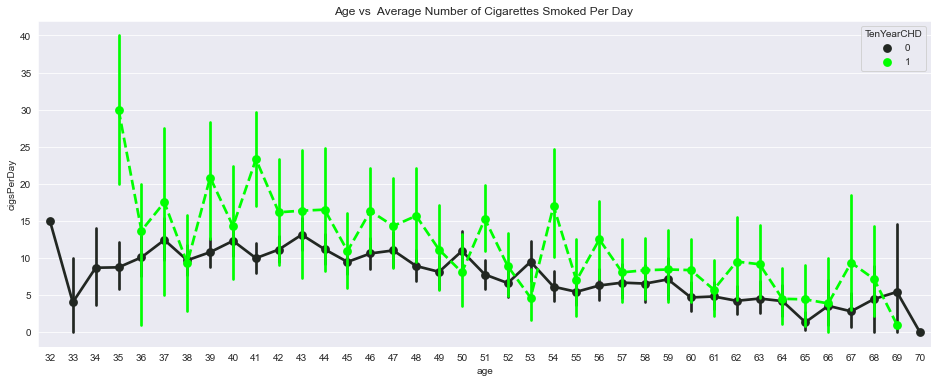

In [85]:
fig,ax=plt.subplots(figsize=(16,6))
sn.pointplot(x='age',y='cigsPerDay',data=chd_df,color='Lime',hue='TenYearCHD',linestyles=["-", "--"])
plt.title('Age vs  Average Number of Cigarettes Smoked Per Day ')
#People with heart disease tend to have higher 

Text(0.5, 1.0, 'Age vs Diastolic Blood Pressure')

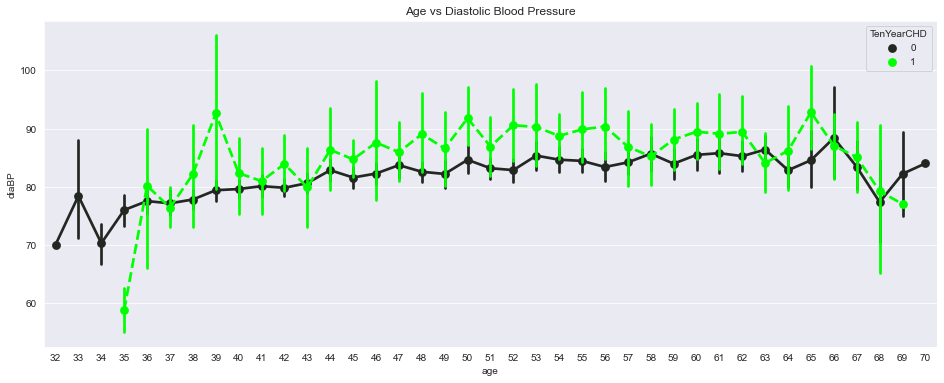

In [86]:

fig,ax=plt.subplots(figsize=(16,6))
sn.pointplot(x='age',y='diaBP',data=chd_df,color='Lime',hue='TenYearCHD',linestyles=["-", "--"])
plt.title('Age vs Diastolic Blood Pressure')
#People with heart disease tend to have higher 

Text(0.5, 1.0, 'Age vs Systolic Blood Pressure')

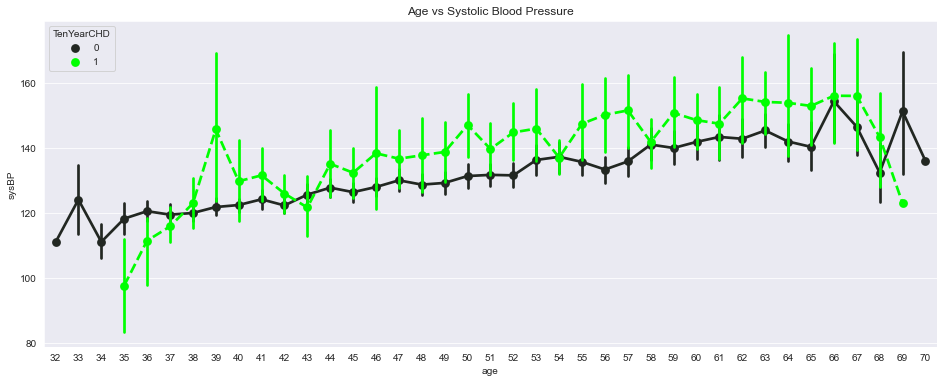

In [87]:
#Danuka
fig,ax=plt.subplots(figsize=(16,6))
sn.pointplot(x='age',y='sysBP',data=chd_df,color='Lime',hue='TenYearCHD',linestyles=["-", "--"])
plt.title('Age vs Systolic Blood Pressure')
#People with heart disease tend to have higher

Text(0.5, 1.0, 'Age vs Continuous Heart Rate')

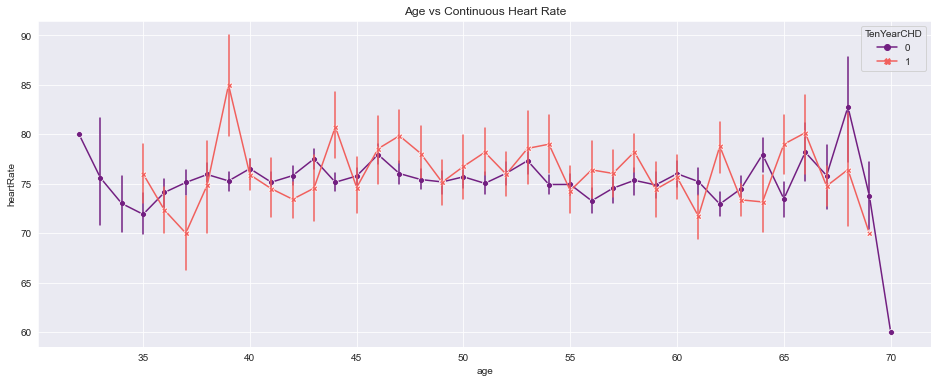

In [88]:
#Danuka
fig,ax=plt.subplots(figsize=(16,6))
sn.lineplot(y='heartRate',x='age',data=chd_df,hue="TenYearCHD",style='TenYearCHD',palette='magma',markers=True, dashes=False,err_style="bars", ci=68)
plt.title('Age vs Continuous Heart Rate')


In [20]:
y=chd_df['TenYearCHD']

In [21]:
chd_df=pd.get_dummies(chd_df,drop_first=True)
chd_df.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [22]:
X=chd_df.drop('TenYearCHD',axis=1)
X.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [23]:
X.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [90]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.20, random_state=101)

In [97]:
#Sanduni
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train1,y_train1)
    predictions = model.predict(X_test1)
    cla_pred.append(accuracy_score(y_test1,predictions))
    print(name,"{:.2f}%".format(accuracy_score(y_test1,predictions)*100))

Logistic Regression : 84.67%
Decision Tree Classification : 74.40%
Gradient Boosting Classification : 84.67%
Ada Boosting Classification : 84.00%
K-Neighbors Classification : 82.93%
Gaussian Naive Bayes : 83.20%


In [26]:
#Danuka's Contribution
from statsmodels.tools import add_constant as add_constant
heart_details_constant = add_constant(chd_df)
heart_details_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [65]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
col=heart_details_constant.columns[:-1]
hd_model=sm.Logit(chd_df.TenYearCHD,heart_details_constant[col])
lr_result=hd_model.fit()
lr_result.summary()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.1169
Time:                        08:06:50   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
sex_male            0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

In [66]:
def backward_elemination (hd_frame,dependent_var,column_list):
    while len(column_list)>0 :
        model=sm.Logit(dependent_var,hd_frame[column_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            column_list=column_list.drop(largest_pvalue.index)

result=backward_elemination(heart_details_constant,chd_df.TenYearCHD,col)

In [67]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.1148
Time:                        08:06:53   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1211      0.468    -19.491      0.000     -10.038      -8.204
sex_male       0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.006     10.330      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.803      0.000       0.012       0.028
totChol        0.0023      0.001      2.099      0.036       0.000       0.004
sysBP          0.0174      0.002      8.166      0.000       0.013       0.022
glucose        0.0076      0.002      4.573      0.000       0.004       0.011
==============================================================================
"""

In [68]:
hd_params = np.exp(result.params)
conf_intervals = np.exp(result.conf_int())
conf_intervals['OR'] = hd_params
pvalue=round(result.pvalues,3)
conf_intervals['pvalue']=pvalue
conf_intervals.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf_intervals))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000044       0.000274    0.000109   0.000
sex_male        1.454877       2.198166    1.788313   0.000
age             1.054409       1.080897    1.067571   0.000
cigsPerDay      1.011730       1.028128    1.019896   0.000
totChol         1.000150       1.004386    1.002266   0.036
sysBP           1.013299       1.021791    1.017536   0.000
glucose         1.004343       1.010895    1.007614   0.000


In [69]:
#
import sklearn
new_hd_features=chd_df[['age','sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_hd_features.iloc[:,:-1]
y=new_hd_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
print(x_train,x_test,y_train,y_test)

      age  sex_male  cigsPerDay  totChol  sysBP  glucose
1820   55         0         5.0    280.0  144.0     75.0
2979   45         0         0.0    258.0  148.5     90.0
3247   51         1        40.0    212.0  122.5     74.0
1191   60         1        20.0    260.0  178.0     79.0
146    59         0         1.0    259.0  141.0     86.0
...   ...       ...         ...      ...    ...      ...
3612   49         0         0.0    308.0  128.0     70.0
3452   42         0         9.0    195.0  126.0     77.0
1944   39         0         0.0    220.0  137.5     88.0
2549   64         0         0.0    266.0  166.0     87.0
3306   56         1         0.0    193.0  114.0     88.0

[2999 rows x 6 columns]       age  sex_male  cigsPerDay  totChol  sysBP  glucose
3886   65         1         0.0    205.0  106.0     87.0
3026   66         0         0.0    273.0  197.0     80.0
4045   56         1         0.0    177.0  124.0     88.0
2923   43         1        30.0    252.0  112.0     65.0
2167  

In [70]:
#Gamitha-IT19140476
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()
logistic_reg.fit(x_train,y_train)
y_prediction=logistic_reg.predict(x_test)
print(y_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [71]:
sklearn.metrics.accuracy_score(y_test,y_prediction)

0.8706666666666667

<AxesSubplot:>

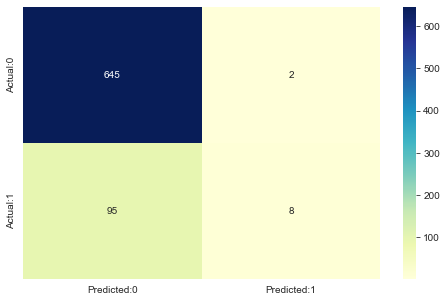

In [72]:
#Sanduni -IT19123578
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [73]:
#Gamitha-IT19140476
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [74]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8706666666666667 
 The Missclassification = 1-Accuracy =  0.1293333333333333 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.07766990291262135 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9969088098918083 
 Positive Predictive value = TP/(TP+FP) =  0.8 
 Negative predictive Value = TN/(TN+FN) =  0.8716216216216216 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  25.126213592232638 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.925190035372921


In [75]:
#Sanduni
y_pred_prob=logistic_reg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.776007,0.223993
1,0.545870,0.454130
2,0.831883,0.168117
3,0.887934,0.112066
4,0.920593,0.079407


In [76]:
#Gamitha-IT19140476
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logistic_reg.predict_proba(x_test)
    y_prediction2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_prediction2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[311 336]
 [  8  95]] 
 with 406 correct predictions and 8 Type II errors( False Negatives) 

 Sensitivity:  0.9223300970873787 Specificity:  0.4806800618238022 



With 0.2 threshold the Confusion Matrix is  
 [[516 131]
 [ 46  57]] 
 with 573 correct predictions and 46 Type II errors( False Negatives) 

 Sensitivity:  0.5533980582524272 Specificity:  0.7975270479134466 



With 0.3 threshold the Confusion Matrix is  
 [[595  52]
 [ 68  35]] 
 with 630 correct predictions and 68 Type II errors( False Negatives) 

 Sensitivity:  0.33980582524271846 Specificity:  0.919629057187017 



With 0.4 threshold the Confusion Matrix is  
 [[638   9]
 [ 88  15]] 
 with 653 correct predictions and 88 Type II errors( False Negatives) 

 Sensitivity:  0.14563106796116504 Specificity:  0.9860896445131375 





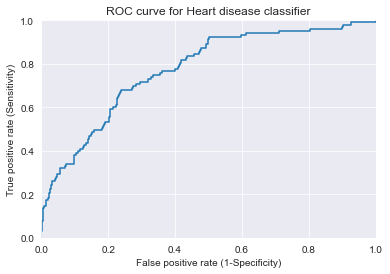

In [77]:
#Sanduni-IT19123578
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [79]:
#Sanduni -IT19123578
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7733827523596586